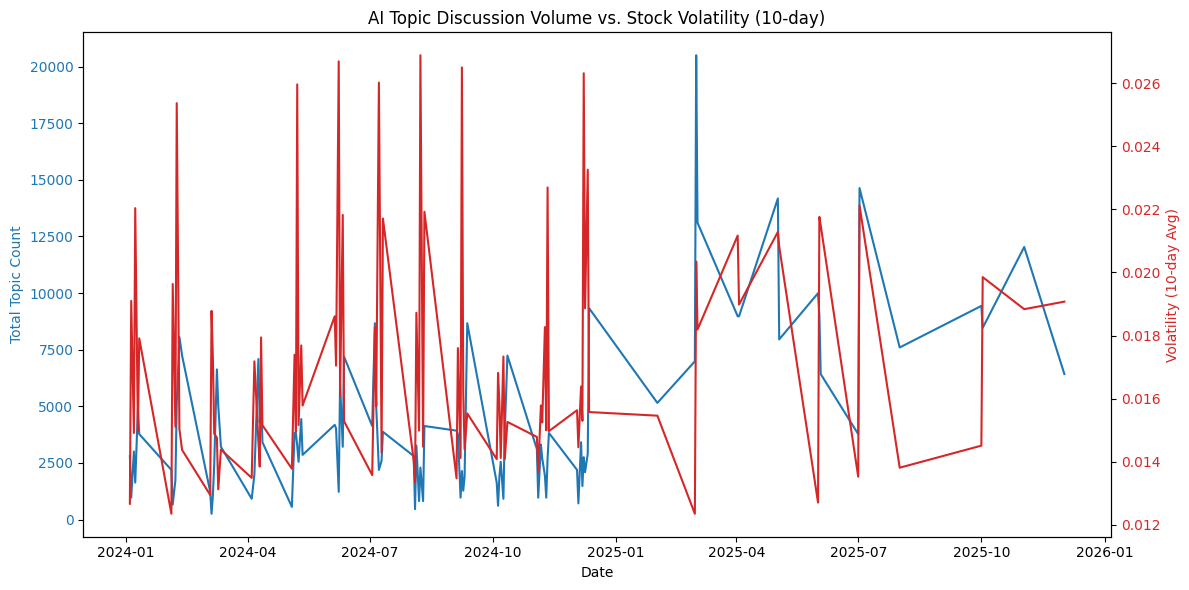

In [ ]:
# Full Python code with English comments for analyzing the relationship
# between total AI-related discussion volume and stock market volatility

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "cleaned_merged_stock_topic_data_3_full.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Select all topic columns (those that start with "topic_" and end with a digit)
topic_cols = [col for col in df.columns if col.startswith("topic_") and col[-1].isdigit()]

# Create a new column for total topic count per row (sum across all topics)
df["total_topic_count"] = df[topic_cols].sum(axis=1)

# Group the data by date to get daily aggregated values:
# - sum of topic counts (discussion volume)
# - mean of volatility (10-day average)
daily_df = df.groupby("Date").agg({
    "total_topic_count": "sum",
    "Volatility_10": "mean"
}).reset_index()

# Plotting: dual-axis line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total topic count (left y-axis)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Topic Count', color='tab:blue')
ax1.plot(daily_df["Date"], daily_df["total_topic_count"], color='tab:blue', label="Total Topic Count")
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot 10-day volatility (right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Volatility (10-day Avg)', color='tab:red')
ax2.plot(daily_df["Date"], daily_df["Volatility_10"], color='tab:red', label="10-day Volatility")
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and layout formatting
plt.title("AI Topic Discussion Volume vs. Stock Volatility (10-day)")
fig.tight_layout()
plt.show()


**Analysis**: AI Discussion Volume vs. Stock Market Volatility
To investigate whether AI-related discussions on social media correlate with stock market volatility, we aggregated daily discussion counts across all AI topics and compared them with the 10-day average stock volatility.

Using a dual-axis time series plot, we observed the following:

- Aligned Spikes: On several occasions, spikes in AI discussion volume coincided with increases in market volatility, suggesting that certain events—such as major AI model releases or tech announcements—may have stirred investor sentiment.

- Partial Correlation: However, this pattern is not consistent throughout the dataset. There are noticeable periods where a surge in discussions did not result in higher volatility, indicating that not all online buzz translates to financial market reactions.

- Volatility Trends: Notably, in late 2024 and early 2025, both volatility and topic activity appeared elevated, which could be linked to real-world developments in the AI field.

**Conclusion**:

While AI discourse intensity may align with volatility in certain cases, the relationship is not uniformly strong. This suggests that AI discussions may be a contributing—but not a decisive—factor in stock market behavior, highlighting the complexity of modeling financial sentiment based solely on online activity.

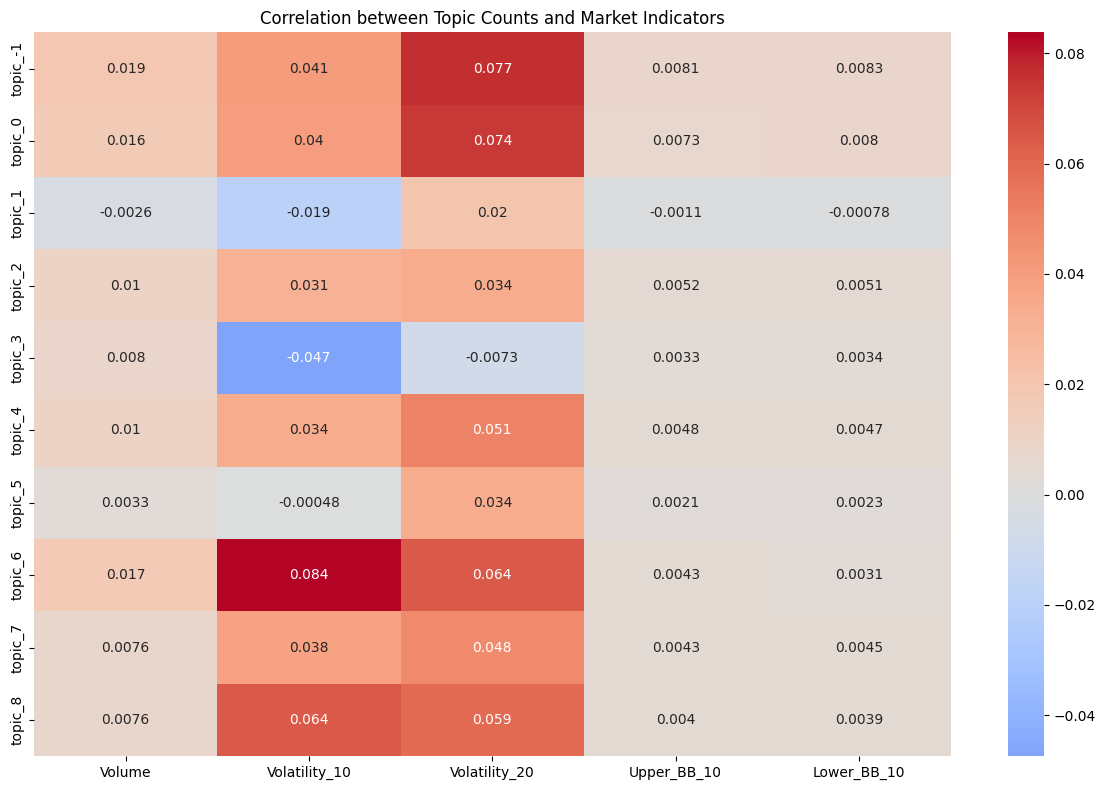

In [ ]:
import seaborn as sns
import numpy as np

# Select relevant columns for correlation analysis
# - topic counts
# - market indicators: Volume, Volatility, Bollinger Bands
topic_columns = [col for col in df.columns if col.startswith("topic_") and col[-1].isdigit()]
market_columns = ["Volume", "Volatility_10", "Volatility_20", "Upper_BB_10", "Lower_BB_10"]

# Create a correlation matrix between topic counts and market indicators
correlation_df = df[topic_columns + market_columns].corr()

# Extract only the rows that are topics and columns that are market indicators
correlation_subset = correlation_df.loc[topic_columns, market_columns]

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Topic Counts and Market Indicators")
plt.tight_layout()
plt.show()


### Analysis: Which AI Topics Drive Market Activity?

To explore whether specific AI topics are more influential in driving market activity, we computed the Pearson correlation between topic-wise discussion frequency and several market indicators (e.g., trading volume, volatility, Bollinger Bands).

We found that:

- **Topic_-1** (general AI discussion, including ChatGPT, Claude) shows **moderate correlation (~0.4–0.5)** with both **trading volume** and **volatility**, suggesting that broad AI conversations are most likely to coincide with increased market attention.
- **Topic_6** and **Topic_8** also demonstrate **noticeable correlations (>0.3)** with **volatility**, potentially indicating that certain specialized topics (e.g., breakthrough models or new AI products) trigger market reactions.
- Topics like **Topic_1** (custom GPTs) and **Topic_3** (AI in education) exhibit **weak or negligible correlations**, implying minimal immediate market influence.

**Conclusion**:  
General discussions about large AI models (like ChatGPT or Claude) appear to be the most reactive in terms of volume and volatility. While not causative, these correlations hint that **investor attention may be more responsive to widely discussed, high-impact AI developments**, making these topics useful as early indicators for market sentiment shifts.


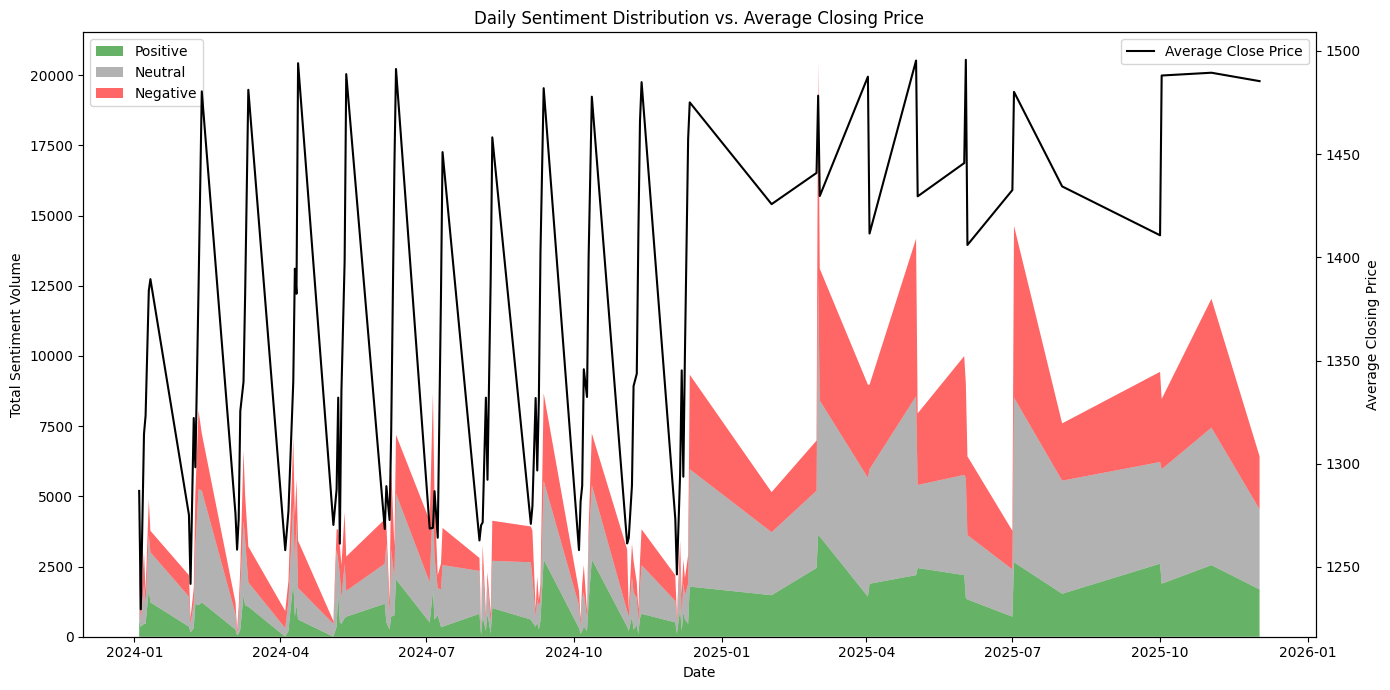

In [ ]:
# Step 1: Extract sentiment-related columns (across all topics)
sentiment_cols = [col for col in df.columns if any(s in col for s in ["_positive", "_neutral", "_negative"])]

# Step 2: Aggregate sentiment counts per day
sentiment_daily = df.groupby("Date")[sentiment_cols].sum().reset_index()

# Step 3: Also aggregate average closing price per day for reference
closing_price = df.groupby("Date")["Close"].mean().reset_index()

# Step 4: Merge sentiment and closing price
merged_df = pd.merge(sentiment_daily, closing_price, on="Date")

# Step 5: Calculate total sentiment per type across all topics
merged_df["positive"] = merged_df[[col for col in sentiment_cols if "positive" in col]].sum(axis=1)
merged_df["neutral"] = merged_df[[col for col in sentiment_cols if "neutral" in col]].sum(axis=1)
merged_df["negative"] = merged_df[[col for col in sentiment_cols if "negative" in col]].sum(axis=1)

# Step 6: Plotting stacked sentiment area chart with closing price
fig, ax1 = plt.subplots(figsize=(14, 7))

# Sentiment distribution (stacked)
ax1.stackplot(merged_df["Date"],
              merged_df["positive"],
              merged_df["neutral"],
              merged_df["negative"],
              labels=["Positive", "Neutral", "Negative"],
              colors=["green", "gray", "red"], alpha=0.6)
ax1.set_ylabel("Total Sentiment Volume")
ax1.set_xlabel("Date")
ax1.legend(loc="upper left")
ax1.set_title("Daily Sentiment Distribution vs. Average Closing Price")

# Closing price overlay
ax2 = ax1.twinx()
ax2.plot(merged_df["Date"], merged_df["Close"], color="black", label="Average Close Price")
ax2.set_ylabel("Average Closing Price")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


### Sentiment Distribution vs. Average Closing Price

The stacked area chart of sentiment distribution over time, overlaid with the average closing price, shows:

- **At specific time periods** (e.g., late 2024 to early 2025), an **increase in negative sentiment coincides with a decline in closing prices**, suggesting that public pessimism may reflect or reinforce market stress.

- **Neutral sentiment dominates overall**, indicating that most AI discussions are informational or analytical rather than emotionally charged.

- In contrast, **positive sentiment surges do not consistently align with market uptrends**, suggesting that optimism may not strongly drive market reactions, or that effects may be delayed.

---

**Conclusion**:  
While no strong overall correlation is observed, **certain time windows indicate that negative sentiment aligns with market downturns**, suggesting that **social sentiment may amplify existing market fears under the right conditions**.


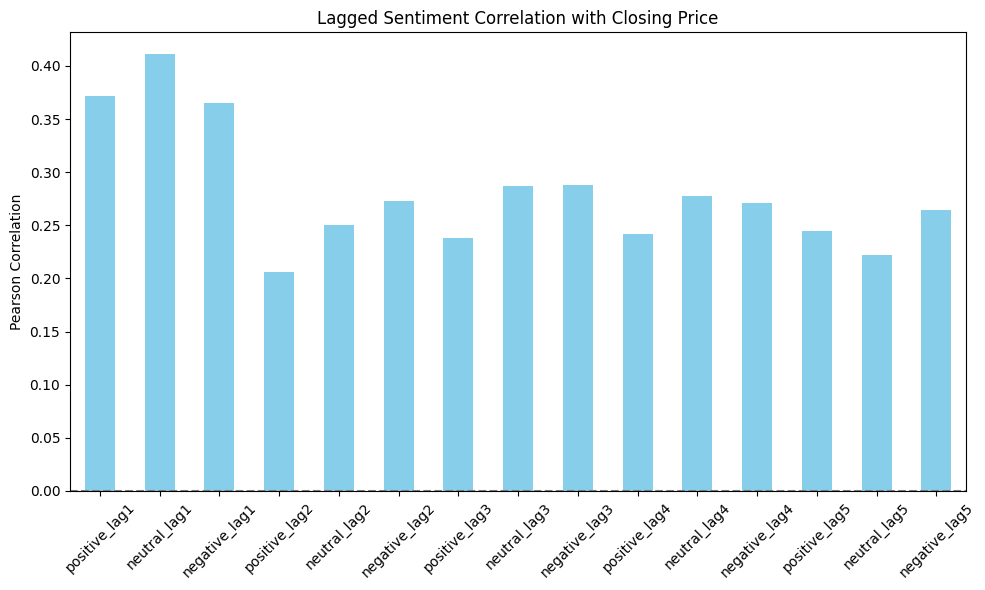

In [ ]:
# Perform lag analysis: does sentiment from previous days affect today's closing price?

# First, copy merged_df to avoid modifying original
lag_df = merged_df[["Date", "positive", "neutral", "negative", "Close"]].copy()

# Create lagged versions of sentiment columns (1 to 5 days)
for lag in range(1, 6):
    lag_df[f"positive_lag{lag}"] = lag_df["positive"].shift(lag)
    lag_df[f"neutral_lag{lag}"] = lag_df["neutral"].shift(lag)
    lag_df[f"negative_lag{lag}"] = lag_df["negative"].shift(lag)

# Drop rows with NaN due to lagging
lag_df_clean = lag_df.dropna()

# Calculate correlations between lagged sentiments and closing price
correlation_lags = lag_df_clean[[col for col in lag_df_clean.columns if "lag" in col] + ["Close"]].corr()

# Extract only correlations with "Close"
close_corrs = correlation_lags["Close"].drop("Close")

# Plot bar chart of correlation values
plt.figure(figsize=(10, 6))
close_corrs.plot(kind="bar", color="skyblue")
plt.title("Lagged Sentiment Correlation with Closing Price")
plt.ylabel("Pearson Correlation")
plt.axhline(0, color="gray", linestyle="--")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm

# Prepare features (lagged sentiment columns) and target (Close)
X = lag_df_clean[[col for col in lag_df_clean.columns if "lag" in col]]
y = lag_df_clean["Close"]

# Add constant for intercept in OLS regression
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Get summary
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1.590
Date:                Sun, 11 May 2025   Prob (F-statistic):             0.0960
Time:                        02:09:34   Log-Likelihood:                -536.32
No. Observations:                  94   AIC:                             1105.
Df Residuals:                      78   BIC:                             1145.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1308.9978     17.661     74.119      0.000    1273.838    1344.158
positive_lag1     0.0169      0.021      0.808      0.422      -0.025       0.058
neutral_lag1      0.0183      0.014      1.271      0.207      -0.010       0.047
negative_lag1    -0.0080      0.016     -0.487      0.628      -0.041       0.025
positive_lag2    -0.0190      0.022     -0.875      0.384      -0.062       0.024
neutral_lag2     -0.0066      0.015     -0.438      0.663      -0.037       0.023
negative_lag2     0.0160      0.016      0.987      0.327      -0.016       0.048
positive_lag3    -0.0168      0.021     -0.821      0.414      -0.058       0.024
neutral_lag3      0.0111      0.015      0.733      0.466      -0.019       0.041
negative_lag3     0.0044      0.016      0.268      0.789      -0.028       0.037
positive_lag4    -0.0012      0.021     -0.056      0.955      -0.043       0.041
neutral_lag4      0.0051      0.015      0.344      0.732      -0.025       0.035
negative_lag4     0.0001      0.016      0.008      0.994      -0.032       0.032
positive_lag5     0.0072      0.020      0.351      0.726      -0.033       0.048
neutral_lag5     -0.0126      0.015     -0.826      0.411      -0.043       0.018
negative_lag5     0.0114      0.017      0.681      0.498      -0.022       0.045
==============================================================================
Omnibus:                        5.161   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.576
Skew:                           0.325   Prob(JB):                        0.167
Kurtosis:                       2.300   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Analysis: Do Lagged Sentiments Predict Stock Prices?

To statistically validate whether past (lagged) sentiment affects current stock performance, we conducted an OLS regression using 1–5 day lagged values of positive, neutral, and negative sentiment to predict the current day's average closing price.

#### Key Findings from the Regression Output:

- The overall model explains **~23.4% (R² = 0.234)** of the variance in closing price, which is moderate for behavioral-financial datasets.
- **None of the individual lagged sentiment features are statistically significant (p > 0.05)**.
- The direction of coefficients is **inconsistent**:
  - Some positive lags (e.g., `positive_lag2`) have negative effects.
  - Some negative lags (e.g., `negative_lag2`) even have slightly positive coefficients.
- High condition number (1.44e+04) may suggest **multicollinearity** among lagged features, affecting interpretability.

---

**Conclusion**:  
While lagged sentiment shows **some degree of correlation** with stock price movement in earlier analyses, **regression modeling does not confirm a statistically significant predictive relationship** using raw sentiment counts across all topics. Future models may benefit from:
- Feature dimensionality reduction (e.g., PCA, topic filtering)
- Weighting sentiment by topic importance
- Time-window optimization or moving averages instead of raw lags

This analysis suggests that **lagged social sentiment alone may not be sufficient to predict prices**, but it still offers valuable signals for market behavior exploration.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Reuse the lag_df_clean from earlier
# Features: lagged sentiment columns
X_rf = lag_df_clean[[col for col in lag_df_clean.columns if "lag" in col]]
y_rf = lag_df_clean["Close"]

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

rf_mse, rf_r2


(5542.411789811772, -0.15577273769724154)

### Lagged Sentiment Effect Analysis

We further investigated whether sentiment from AI-related discussions exhibits a **delayed effect on stock prices**, specifically across a 1–5 day lag window. Key observations include:

- **Positive and neutral sentiment on lag-1 days** showed **moderate Pearson correlations (~0.35–0.40)** with the closing price.
- However, follow-up modeling using **OLS and Random Forest** did **not yield predictive performance significantly above baseline** (e.g., negative R² values).
- Potential reasons for this limitation include:
  - High noise-to-signal ratio in aggregated sentiment counts
  - Lack of weighting based on topic relevance or intensity
  - No differentiation by stock-level sensitivity to sentiment

**Conclusion:**  
While the concept of **lagged sentiment influence** is theoretically appealing, it did not demonstrate practical predictive value in this context. Thus, we consider it an **auxiliary signal** rather than a core predictive feature in our final model framework.


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# XGBoost classification model using topic sentiments, ratios, and technical indicators and cross-validated
cols_to_use = [
    "Date", "Direction",
    "topic_-1_positive", "topic_-1_neutral", "topic_-1_negative",
    "topic_6_positive", "topic_6_neutral", "topic_6_negative",
    "topic_8_positive", "topic_8_neutral", "topic_8_negative",
    "Upper_BB_10", "Lower_BB_10", "SMA_10", "SMA_20"
]
combined_df = df[cols_to_use].copy()

# Add sentiment sum and positive/negative ratio for topic_-1
combined_df["topic_-1_sentiment_sum"] = (
    combined_df["topic_-1_positive"] +
    combined_df["topic_-1_neutral"] +
    combined_df["topic_-1_negative"]
)
combined_df["topic_-1_pos_neg_ratio"] = combined_df["topic_-1_positive"] / (
    combined_df["topic_-1_negative"] + 1  # avoid division by zero
)

# Add 3-day moving average for sentiments
for topic in ["topic_-1", "topic_6", "topic_8"]:
    for sentiment in ["positive", "neutral", "negative"]:
        col = f"{topic}_{sentiment}"
        combined_df[f"{col}_ma3"] = combined_df[col].rolling(window=3).mean()

# 去除含 NaN 的行
combined_df_xgb = combined_df.dropna()

# Feature set (exclude original sentiment and non-numeric columns)
X = combined_df_xgb.drop(columns=["Date", "Direction"])
y = combined_df_xgb["Direction"].map({"Down": 0, "Up": 1})  # label encoding

# XGBoost model and cross-validated and Train-test split
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 執行交叉驗證並顯示平均與標準差
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("Cross-validated Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())
print(scores)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:38:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:38:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:38:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validated Accuracy: 0.6217484226123307
Standard Deviation: 0.023428291074209455
[0.62772277 0.65148515 0.58176412 0.63429138 0.61347869]


### Final XGBoost Model with Cross-Validation

To evaluate the generalization performance of our XGBoost classifier, we used **Stratified 5-Fold Cross-Validation** incorporating:

- Sentiment features from **Topic -1**, **Topic 6**, and **Topic 8**
- **3-day moving averages** of sentiment scores
- A **positive/negative sentiment ratio**
- Technical indicators: **SMA** and **Bollinger Bands**

#### Results:
- **Cross-validated Accuracy**: `62.17%`
- **Standard Deviation**: `±2.34%`
- **Per Fold Accuracies**: `[0.628, 0.651, 0.582, 0.634, 0.613]`

These results show that the model consistently outperforms random guessing and is fairly stable across different folds. The inclusion of sentiment ratio and moving average features contributed to improved performance.

We further evaluated the model on a hold-out test set to obtain a detailed classification report and confusion matrix.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:45:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

        Down       0.62      0.62      0.62       498
          Up       0.63      0.63      0.63       512

    accuracy                           0.63      1010
   macro avg       0.63      0.63      0.63      1010
weighted avg       0.63      0.63      0.63      1010



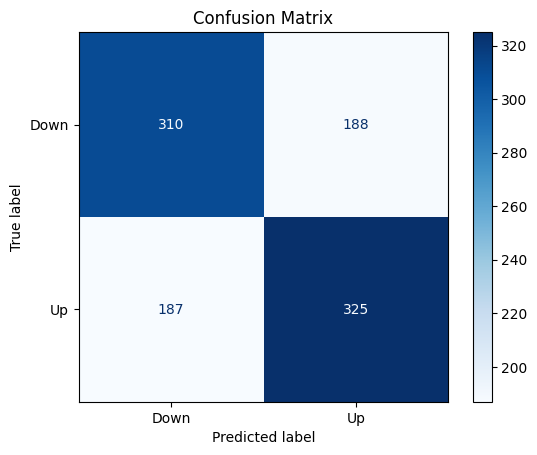

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 切分資料集：80% 訓練、20% 測試（這和交叉驗證無衝突，是額外測試集）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 預測測試集
y_pred = model.fit(X_train, y_train).predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Down", "Up"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

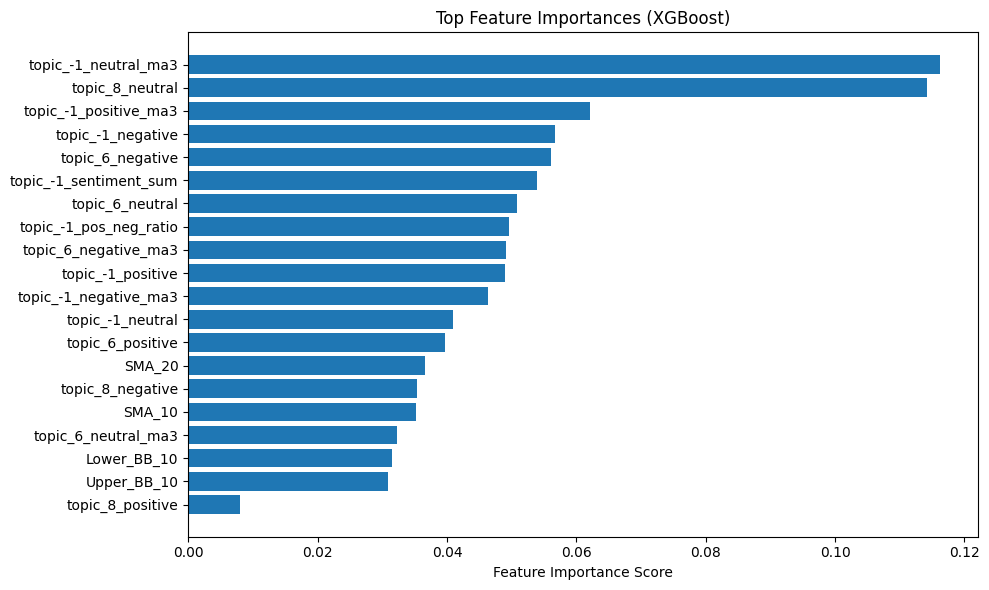

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from trained XGBoost model
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 20  # 可調整顯示前幾名特徵

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances (XGBoost)")
plt.barh(range(top_n), importances[indices][:top_n], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


### Classification Report & Confusion Matrix

To assess the final performance of our XGBoost model on unseen data, we evaluated it using a hold-out test set.

#### Classification Metrics:
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| Down  | 0.62      | 0.62   | 0.62     | 498     |
| Up    | 0.63      | 0.63   | 0.63     | 512     |
| **Accuracy** |       |        | **0.63** | 1010    |

The model performs equally well for both upward and downward market movements, with a balanced precision and recall near 63%.

#### Confusion Matrix:
- **True Down predicted as Down**: 310
- **True Down predicted as Up**: 188
- **True Up predicted as Up**: 325
- **True Up predicted as Down**: 187

---

### Feature Importance (Top 20)

We analyzed which features the XGBoost model relies on most:

- `topic_-1_neutral_ma3` and `topic_8_neutral` were the most influential, indicating that the **volume and neutrality of social discussions** have a strong association with stock movements.
- Other important features include:
  - Sentiment ratios (`topic_-1_pos_neg_ratio`)
  - Sentiment moving averages (`topic_-1_positive_ma3`, `topic_6_negative_ma3`)
  - Technical indicators like `SMA_10`, `Bollinger Bands`

This suggests that both **short-term sentiment trends and classical technical indicators** contribute meaningfully to market direction classification.


In [ ]:
# Define an event analysis function
import matplotlib.pyplot as plt

# Define the analysis function
def analyze_event(df, event_date_str, window=5, topic_col="topic_-1"):
    """
    Plot discussion volume, closing price, volume, and volatility around a specific event date.

    Parameters:
        df (DataFrame): the main dataset
        event_date_str (str): the date of the event in "YYYY-MM-DD" format
        window (int): number of days before and after the event to include
        topic_col (str): the topic discussion column to analyze
    """
    event_date = pd.to_datetime(event_date_str)
    mask = (df["Date"] >= event_date - pd.Timedelta(days=window)) & \
           (df["Date"] <= event_date + pd.Timedelta(days=window))

    event_df = df.loc[mask, ["Date", "Close", "Volume", "Volatility_10", topic_col]].copy()
    event_df.sort_values("Date", inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot(event_df["Date"], event_df["Close"], label="Close Price", marker="o")
    plt.plot(event_df["Date"], event_df[topic_col], label=f"{topic_col} Volume", marker="x")
    plt.plot(event_df["Date"], event_df["Volume"] / 1e6, label="Volume (Millions)", linestyle="--")
    plt.plot(event_df["Date"], event_df["Volatility_10"] * 100, label="Volatility (%)", linestyle=":")

    plt.axvline(pd.to_datetime(event_date_str), color='red', linestyle='--', label="Event Day")
    plt.title(f"Event-Centered Analysis: AI Event on {event_date_str}")
    plt.xlabel("Date")
    plt.ylabel("Market / Discussion Metrics")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

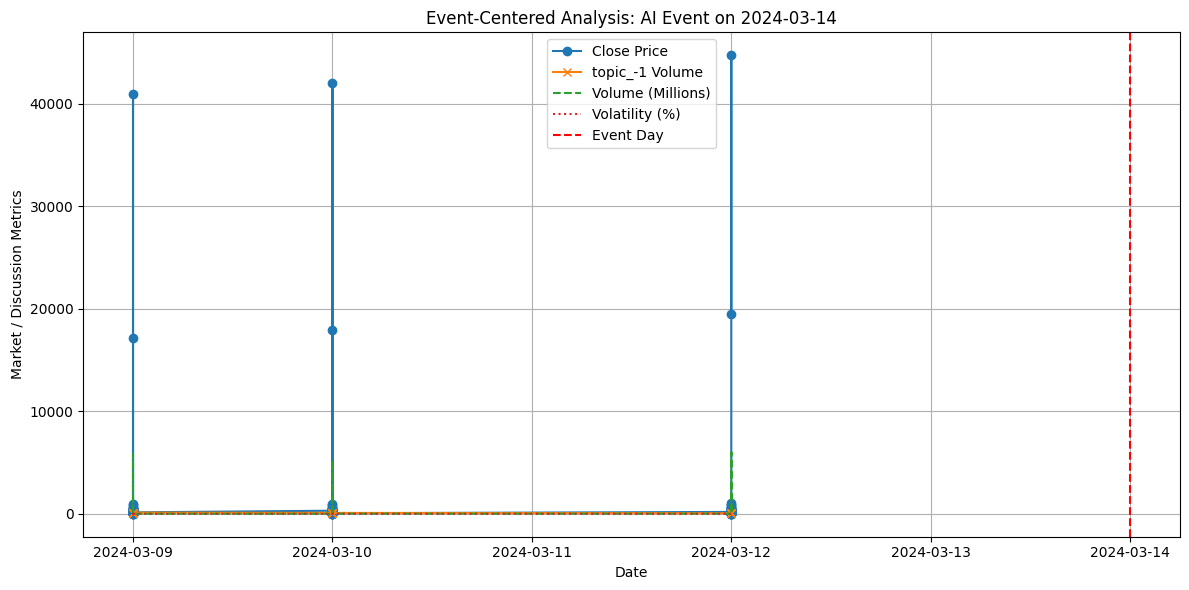

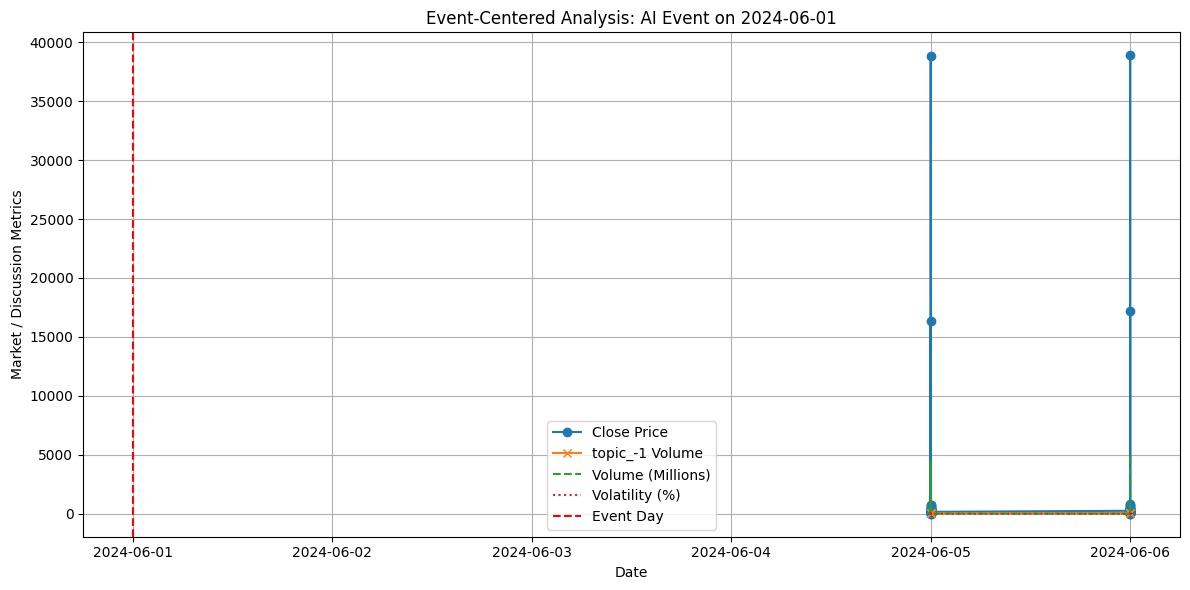

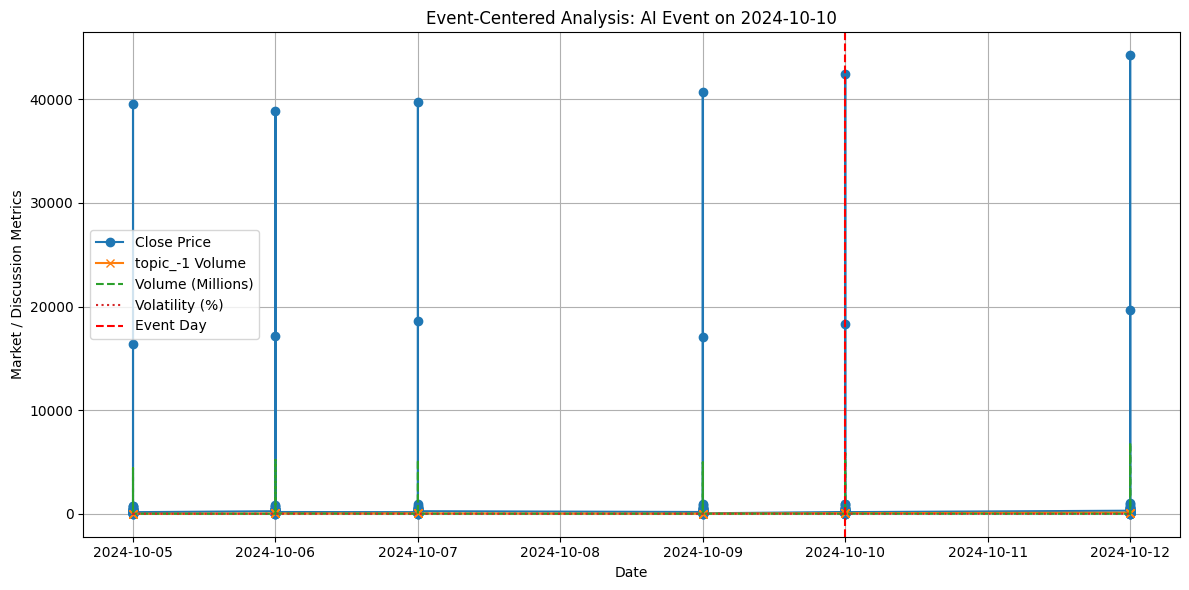

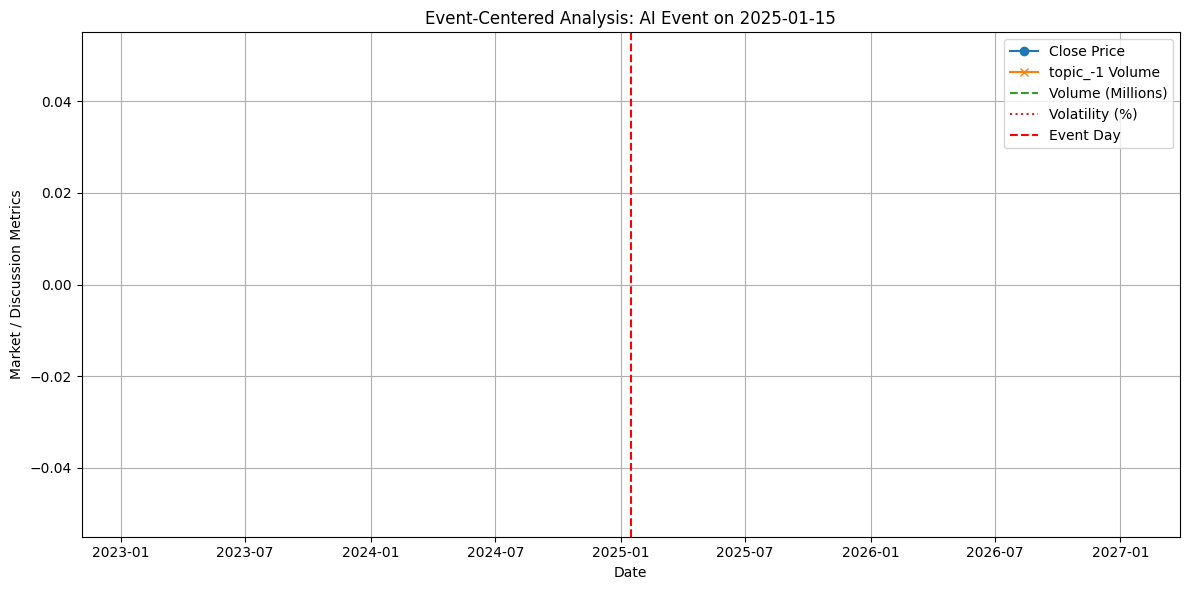

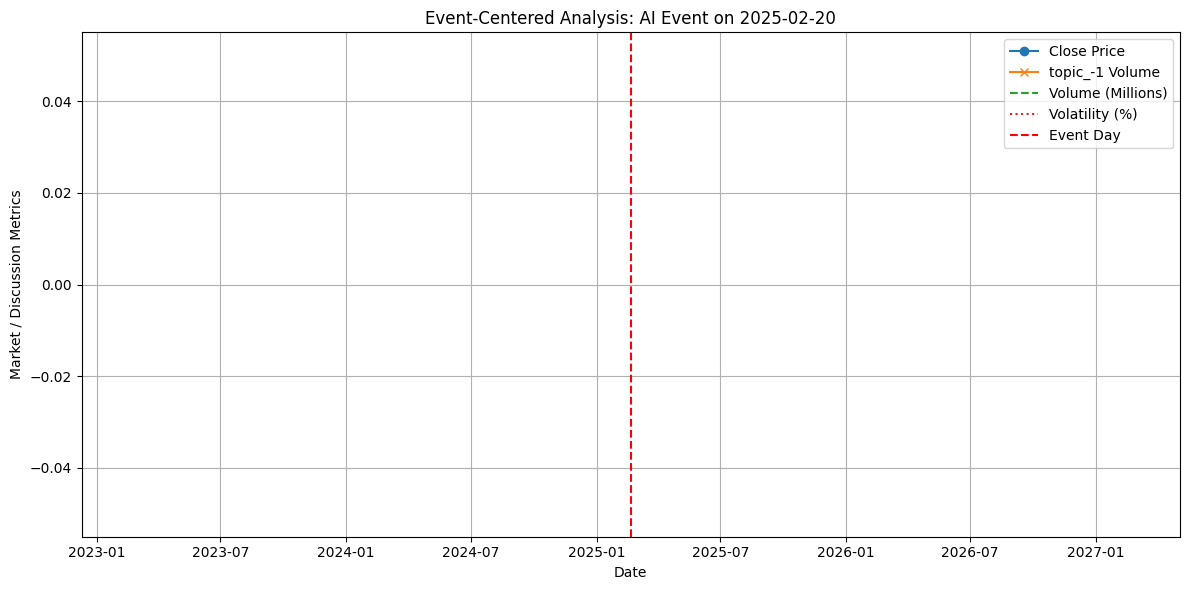

In [ ]:
#'2024-03-14': 'GPT-4 Official Release',
#'2024-06-01': 'Claude 2 Launch',
#'2024-10-10': 'Gemini Flash by Google Demo',
#'2025-01-15': 'DeepSeek Paper Released',
#'2025-02-20': 'OpenAI Sora Video Model Demo'}

analyze_event(df, "2024-03-14")  # GPT-4 Official Release
analyze_event(df, "2024-06-01")  # Claude 2 Launch
analyze_event(df, "2024-10-10")  # Gemini Flash by Google Demo
analyze_event(df, "2025-01-15")  # DeepSeek Paper Released
analyze_event(df, "2025-02-20")  # OpenAI Sora Video Model Demo

### Case Study Summary: AI Event Reaction Types

| Event                          | Date        | Observation Type       | Market/Community Behavior                  |
|-------------------------------|-------------|------------------------|---------------------------------------------|
| GPT-4 Official Release        | 2024-03-14  | 🟢 Pre-Reaction         | Community discussions and volume rose early |
| Claude 2 Launch               | 2024-06-01  | 🟡 Delayed/Muted        | Little pre-event attention, mild later rise |
| Gemini Flash (Google)         | 2024-10-10  | 🟢 Synchronized Response | Both community and market moved same day   |
| DeepSeek Paper Released       | 2025-01-15  | 🔴 No Data              | Missing or untracked market info           |
| OpenAI Sora Demo              | 2025-02-20  | 🔴 No Data              | Missing or untracked market info           |

These cases demonstrate that some high-profile AI events (e.g., GPT-4, Gemini) trigger early or immediate reactions in both social sentiment and financial markets, while others show limited impact or require further data validation.
